<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Homogeneous ensemble methods
 
© ExploreAI Academy

In this train, we'll learn about homogeneous ensemble methods, employing identical models but varying data or parameters to boost diversity and performance.


## Learning objectives

By the end of this train, you should be able to:
* Understand homogeneous ensemble methods and their setup.
* Discover methods to foster diversity in similar model ensembles.
* Assess how these methods affect model precision and robustness.


## Homogeneous ensembles

Ensemble learning in machine learning is the practice of **combining multiple models** to try and achieve higher overall model performance.

A commonly used example of an ensemble model is a random forest. Random forests **combine multiple homogeneous models** (i.e. decision trees) to make predictions. In homogeneous ensemble methods (and random forest models), **diversity in model performance** is promoted by their ability to **control** the **number of predictors** or **portion of data** supplied to each model in the ensemble.

Other than the possibility of improving model performance, there are [lots of other reasons](https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2) why we might want to build an ensemble.

In this train, we explore some **homogeneous ensemble** methods.

Some of the most common methods for combining homogeneous models in this way include **bagging** and **boosting**. We will look at how to implement both methods in Python.

## Homogeneous ensembling in Python


#### Import libraries and data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

We will use a version of [Kaggle's](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) house price regression data for predicting the price of a house given a set of variables.

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


The data consists of two variables:
 * `LotArea` in m$^{2}$.
 * `SalePrice` in Rands.
 
We will be using the value of `LotArea` (independent variable) to try and predict the `SalePrice` (dependent variable).   

Let's take a look at the data using `matplotlib`:

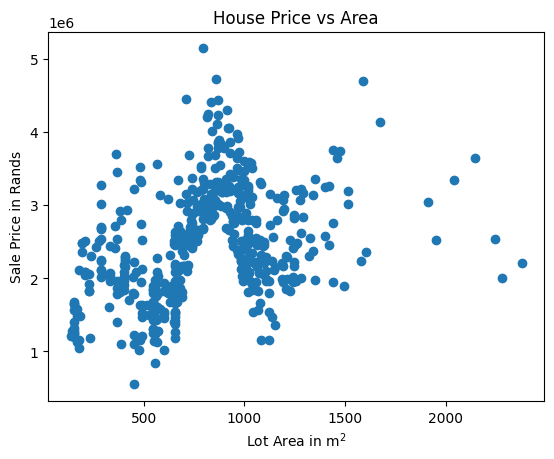

In [3]:
X = df["LotArea"] # Independent variable
y = df["SalePrice"] # Dependent variable

plt.scatter(X,y) # Create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

#### Pre-processing

Next we scale and split our dataset into training and testing sets so that we can later evaluate the performance of the model.

In [4]:
# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)

### a) Bagging (AKA bootstrap aggregating)

Bagging involves training the models of the ensemble on **different subsets of the training data**, particularly on subsets which are **sampled with replacement** from the training data. 

As such, the resulting 'bag' of models are together more stable due to decreased variance error. 

The predictions are made by **aggregating the predictions** of all the models in the bag.

Within the code below, we implement such a bagging ensemble using `sklearn`'s `BaggingRegressor` class. 

In [5]:
# Importing the BaggingRegressor class from sklearn
from sklearn.ensemble import BaggingRegressor

**Building the bagging ensemble:**

Here, we pick what base model to use in our ensemble. 

In [6]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(estimator = d_tree)

**Training the bagging ensemble:**

In [7]:
bag_reg.fit(x_train,y_train[:,0])

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4))

**Checking the performance of the bagging ensemble:**

RMSE:  0.78774897841323


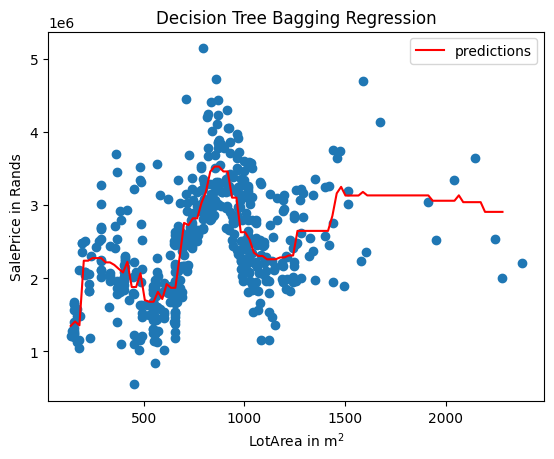

In [10]:
y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Bagging Regression")
plt.legend()
plt.show()

When we try and run the above code cells a couple of times, we observe that the **RMSE error metric changes**. This occurs due to the random sampling process that is used to build our ensemble. 

As such, it's often good practice to manually set or record the `random_state` variable used to derive a specific result. This allows your work to be reproducible and easy to share with others.   

### b) Boosting

Boosting ensembles are built by **combining multiple 'weak models'** (for example, a decision tree with a depth of 1) in a **sequential fashion**. 

Each model is built from the previous model's training set. This training set is selected through weighted sampling (with replacement) where the weights are the previous model's prediction errors (for example, residuals) on individual training samples.

The final predictions are then made by **aggregating the individual predictions** of all the models in the ensemble.

Let's see how this is implemented in `sklearn` using the `AdaBoostRegressor` class. 

In [11]:
# Importing the AdaBoostRegressor class from sklearn
from sklearn.ensemble import AdaBoostRegressor

**Building the boosting ensemble:**

Again, we pick what base model to use in our ensemble. 

In [12]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=3)

# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(estimator = d_tree)

**Training the boosting ensemble:**

In [13]:
bst_reg.fit(x_train,y_train[:,0])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

**Checking the performance of the boosting ensemble:**

RMSE:  0.7727458185721882


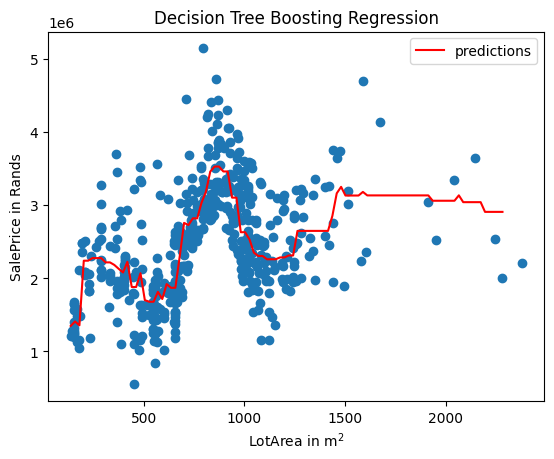

In [14]:
y_pred = bst_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the boosting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Boosting Regression")
plt.legend()
plt.show()

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>